1. y=mx+c (tweaking thm and c values to find the best values of y for x)
2. error function = E = 1/N* SUM ( Y ACTUAL VALUE - Y PREDICTED VALUE)^2
3. E= 1/n * Sum ( yi- (mx+c))^2 from the zeroth point to last point (n)
4. Mean Squared Error (MSE): This is the most frequently used error metric in linear regression. It quantifies the average squared difference between the predicted values and the actual observed values. Mathematically, it’s calculated as:
MSE=n1​i=1∑n​(yi​−y^​i​)2
Here:

(n) represents the number of data points.
(y_i) is the actual value for the (i)-th data point.
(\hat{y}_i) is the predicted value for the (i)-th data point.

5. minimizie the error function; find c and m to minimize the error ; take partial derivate with respect to m and b and then going to the opp direction of gradient

6. partial derivative of e / partial derivative of m =-2/n * sum * xi (yi -(mxi+c))

7. changing direction : m=m-L (LEARNING RATE)* 2E/2M (LEARNING RATE : HOW LARGER THE STEPS WE ARE TAKING AND LEARNING RATE SHOULD BE LESS CUZ ATTENTION TO DETAIL IS NECESSARy)

8.  partial derivative of e / partial derivative of b =-2/n * sum *(yi -(mxi+c))

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
file = pd.read_csv ("The Titanic dataset.csv")

file.reset_index(inplace=True, drop=True)
file=file.drop(file.index[0])
file.columns = ['sn', 'pclass', 'survived', 'name', 'gender', 'age', 'family', 'fare', 'embarked', 'date']

In [39]:
file

,sn,pclass,survived,name,gender,age,family,fare,embarked,date
1,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
2,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
3,2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90
4,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90
5,4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2,20.25,S,04-Jan-90
...,...,...,...,...,...,...,...,...,...,...
1297,1296,2,0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24,0,13,S,19-Jul-93
1298,1297,3,0,"Zabour, Miss. Hileni",female,14.5,1,14.4542,C,20-Jul-93
1299,1298,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,7.225,C,21-Jul-93
1300,1299,3,0,"Zakarian, Mr. Ortin",male,27,0,7.225,C,22-Jul-93


C:\Users\Noman\AppData\Local\Temp\ipykernel_28148\3262998306.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file["fare"]=file["fare"].astype(int)


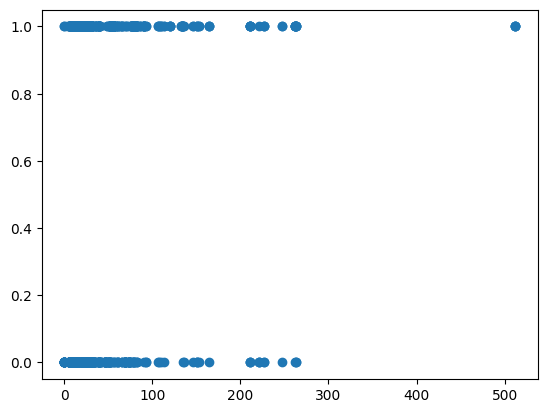

In [40]:
file["survived"] = pd.to_numeric(file["survived"], errors='coerce').fillna(0).astype(int)
file["fare"] = pd.to_numeric(file["fare"], errors='coerce')
file = file.dropna(subset=["fare"])

file["fare"]=file["fare"].astype(int)
plt.scatter(file.fare, file.survived)
plt.show()

In [43]:
def mean_squared_error(m, c, points ):
    total_error = 0
    for i in range(len(points)):
        
        x=points.iloc[i].fare
        y=points.iloc[i].survived
        total_error+=(y-(m*x+c))**2#the loop is the sum function h
    total_error/float(len(points))
    

Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
Epoch: 250
the most accurate value of m is:
 0.004964263160993429
the most accurate value of c is:
 0.001360727175654819


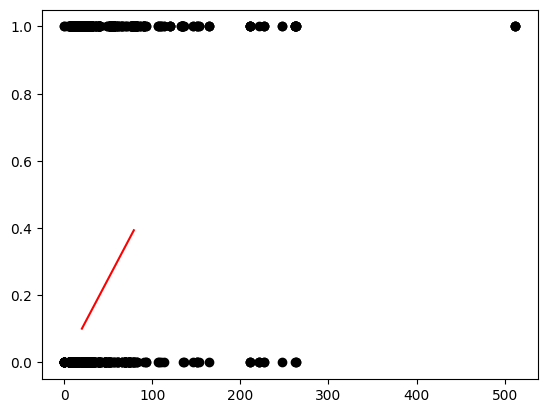

In [56]:
def gradient_descend(m_now, c_now , points , L):
    m_gradient=0
    c_gradient=0
    n=len(points)
    for i in range(n):
        x= points.iloc[i].fare
        y=points.iloc[i].survived
        m_gradient+=(-2/n)* x *(y-(m_now*x+ c_now))
        c_gradient+=(-2/n)* (y-(m_now*x+ c_now))     
    m= m_now - m_gradient * L
    c= c_now-c_gradient *L
    return m , c
                     


m=0
c=0
L=0.00001
epochs=300 #(iterations)

for i in range (epochs):
    if i % 50==0:
        print(f"Epoch: {i}")
    m,c= gradient_descend (m, c, file, L)
print("the most accurate value of m is:\n " +str( m))
print("the most accurate value of c is:\n "+str(c))
plt.scatter( file.fare, file.survived, color= "black")   
plt.plot(list(range(20, 80)), [m*x +c for x in range (20,80)], color="r")
plt.show()

        

In [57]:
data=pd.read_csv ("gas prices.csv")
data

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11
5,1995,1.95,1.53,4.26,3.96,4.00,4.43,1.11,2.94,3.21,1.15
6,1996,2.12,1.61,4.41,3.94,4.39,3.64,1.25,3.18,3.34,1.23
7,1997,2.05,1.62,4.00,3.53,4.07,3.26,1.47,3.34,3.83,1.23
8,1998,1.63,1.38,3.87,3.34,3.84,2.82,1.49,3.04,4.06,1.06
9,1999,1.72,1.52,3.85,3.42,3.87,3.27,1.79,3.80,4.29,1.17


<function matplotlib.pyplot.show(close=None, block=None)>

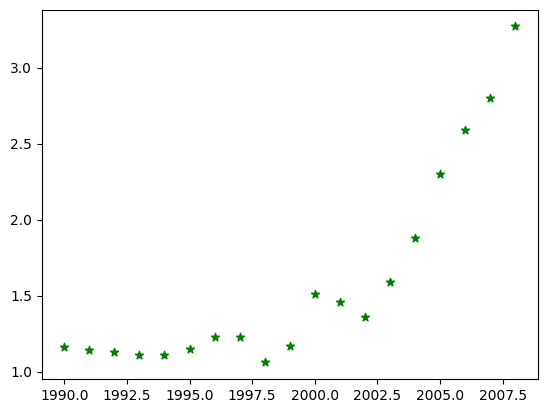

In [58]:
plt.scatter ( data.Year , data.USA, marker="*", color="green")
plt.show

Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200


C:\Users\Noman\AppData\Local\Temp\ipykernel_28148\2446794102.py:8: RuntimeWarning: overflow encountered in scalar add
  m_gradient+=(-2/n)* x *(y-(m_now*x+ c_now))
C:\Users\Noman\AppData\Local\Temp\ipykernel_28148\2446794102.py:10: RuntimeWarning: invalid value encountered in scalar subtract
  m= m_now - m_gradient * L


Epoch: 250


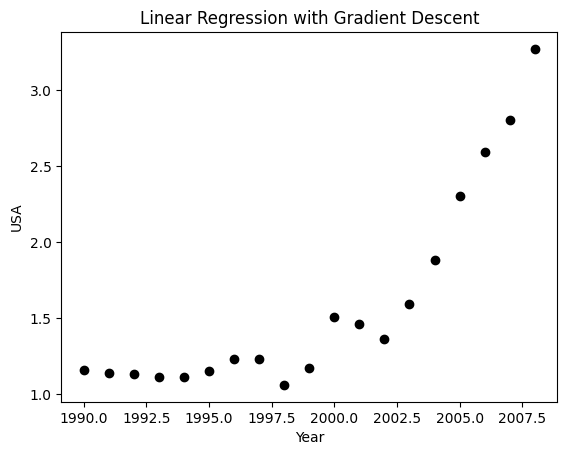

In [59]:
def gradient_descend(m_now, c_now , points , L):
    m_gradient=0
    c_gradient=0
    n=len(points)
    for i in range(n):
        x = points.iloc[i].Year
        y = points.iloc[i].USA
        m_gradient+=(-2/n)* x *(y-(m_now*x+ c_now))
        c_gradient+=(-2/n)* (y-(m_now*x+ c_now))     
    m= m_now - m_gradient * L
    c= c_now-c_gradient *L
    return m , c
                     


m=0
c=0
L=0.00001
epochs=300
#(iterations)

for i in range (epochs):
    if i % 50==0:
        print(f"Epoch: {i}")
    m,c= gradient_descend (m, c, data, L)
    
plt.scatter(data.Year, data.USA, color="black")
plt.plot(list(range(20, 80)), [m * x + c for x in range(20, 80)], color="r")
plt.xlabel("Year")
plt.ylabel("USA")
plt.title("Linear Regression with Gradient Descent")
plt.show()

Epoch: 0
Epoch: 100
Epoch: 200
Epoch: 300
Epoch: 400
Epoch: 500
Epoch: 600
Epoch: 700
Epoch: 800
Epoch: 900
The most accurate value of m is: 7.634756689635125
The most accurate value of c is: 0.5325412696801133


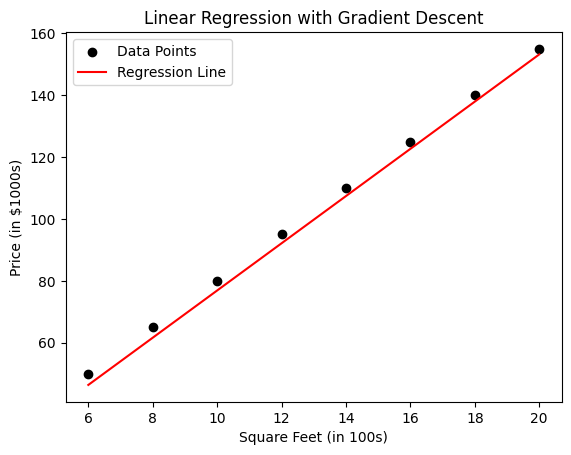

In [53]:
data = {
    "SquareFeet": [6, 8, 10, 12, 14, 16, 18, 20],
    "Price": [50, 65, 80, 95, 110, 125, 140, 155]
}
df = pd.DataFrame(data)


def gradient_descent(m_now, c_now, points, L):
    m_gradient = 0
    c_gradient = 0
    n = len(points)
    for i in range(n):
        x = points.iloc[i].SquareFeet
        y = points.iloc[i].Price
        m_gradient += (-2/n) * x * (y - (m_now * x + c_now))
        c_gradient += (-2/n) * (y - (m_now * x + c_now))
    m = m_now - m_gradient * L
    c = c_now - c_gradient * L
    return m, c

m = 0
c = 0
L = 0.00001
epochs = 1000  # (iterations)

for i in range(epochs):
    if i % 100 == 0:
        print(f"Epoch: {i}")
    m, c = gradient_descent(m, c, df, L)

print("The most accurate value of m is: " + str(m))
print("The most accurate value of c is: " + str(c))


plt.scatter(df.SquareFeet, df.Price, color="black", label="Data Points")

plt.plot(df.SquareFeet, [m * x + c for x in df.SquareFeet], color="red", label="Regression Line")
plt.xlabel("Square Feet (in 100s)")
plt.ylabel("Price (in $1000s)")
plt.title("Linear Regression with Gradient Descent")
plt.legend()
plt.show()

In [61]:
data = {
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
    'Matches_Played': [30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80],
    'Wins': [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65],
    'Losses': [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
    'Draws': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    'Win_Percentage': [50, 57, 62, 67, 70, 73, 75, 77, 79, 80, 81]
}

df = pd.DataFrame(data)

df

,Year,Matches_Played,Wins,Losses,Draws,Win_Percentage
0,2000,30,15,10,5,50
1,2001,35,20,10,5,57
2,2002,40,25,10,5,62
3,2003,45,30,10,5,67
4,2004,50,35,10,5,70
5,2005,55,40,10,5,73
6,2006,60,45,10,5,75
7,2007,65,50,10,5,77
8,2008,70,55,10,5,79
9,2009,75,60,10,5,80


Epoch: 0
Epoch: 100
Epoch: 200
Epoch: 300
Epoch: 400
Epoch: 500
Epoch: 600
Epoch: 700
Epoch: 800
Epoch: 900
The most accurate value of m is: 1.2119912460453675
The most accurate value of c is: 0.5926277456332549


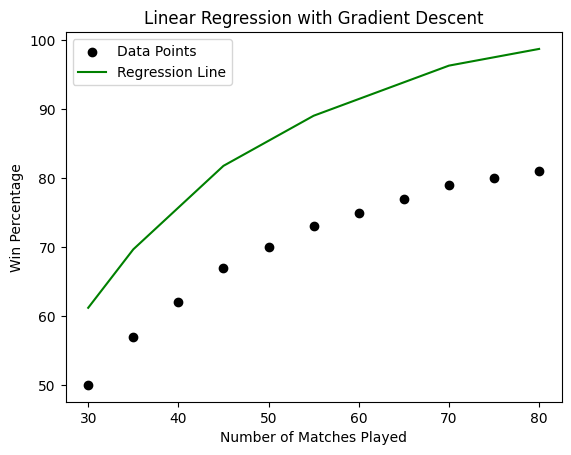

In [72]:
def gradient_descent(m_now, c_now, points, L):
    m_gradient = 0
    c_gradient = 0
    n = len(points)
    for i in range(n):
        x = points.iloc[i].Matches_Played
        y = points.iloc[i].Win_Percentage
        m_gradient += (-2/n) * x * (y - (m_now * x + c_now))
        c_gradient += (-2/n) * (y - (m_now * x + c_now))
    m = m_now - m_gradient * L
    c = c_now - c_gradient * L
    return m, c

m = 0
c = 0
L = 0.0001
epochs = 1000  # (iterations)

for i in range(epochs):
    if i % 100 == 0:
        print(f"Epoch: {i}")
    m, c = gradient_descent(m, c, df, L)

print("The most accurate value of m is: " + str(m))
print("The most accurate value of c is: " + str(c))


plt.scatter(df.Matches_Played, df.Win_Percentage, color="black", label="Data Points")

plt.plot(df.Matches_Played, [m * x + c for x in df.Win_Percentage], color="green", label="Regression Line")
plt.xlabel("Number of Matches Played")
plt.ylabel("Win Percentage")
plt.title("Linear Regression with Gradient Descent")
plt.legend()
plt.show()

Epoch: 0
Epoch: 100
Epoch: 200
The most accurate value of m is: -3.7440818029756805e+252
The most accurate value of c is: -1.8673678251485077e+249


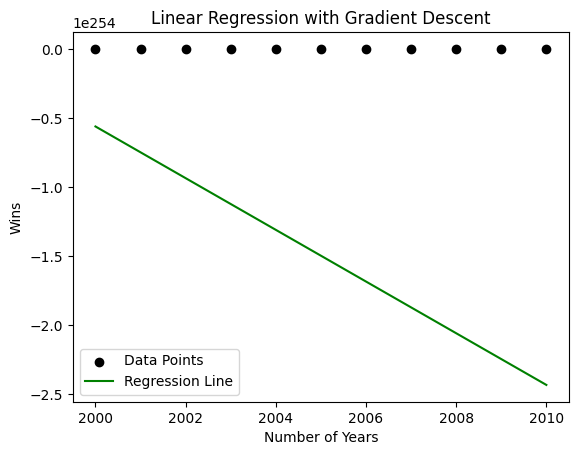

In [76]:
def gradient_descent(m_now, c_now, points, L):
    m_gradient = 0
    c_gradient = 0
    n = len(points)
    for i in range(n):
        x = points.iloc[i].Year
        y = points.iloc[i].Wins
        m_gradient += (-2/n) * x * (y - (m_now * x + c_now))
        c_gradient += (-2/n) * (y - (m_now * x + c_now))
    m = m_now - m_gradient * L
    c = c_now - c_gradient * L
    return m, c

m = 0
c = 0
L = 0.000001
epochs = 300  # (iterations)

for i in range(epochs):
    if i % 100 == 0:
        print(f"Epoch: {i}")
    m, c = gradient_descent(m, c, df, L)

print("The most accurate value of m is: " + str(m))
print("The most accurate value of c is: " + str(c))


plt.scatter(df.Year, df.Wins, color="black", label="Data Points")
plt.plot(df.Year, [m * x + c for x in df.Wins], color="green", label="Regression Line")
plt.xlabel("Number of Years")
plt.ylabel("Wins")
plt.title("Linear Regression with Gradient Descent")
plt.legend()
plt.show()